In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
import datetime 
import os
from tqdm.notebook import tqdm
import pickle

from WindPy import w
w.start() 
w.isconnected()

True

利用聪明度指标 S，从分钟数据中筛选出属于“聪明钱”的交易。

聪明钱在交易过程中往往呈现“单笔订单数量更大、订单报价更为激进”的特征

$S_t = |R_t|/\sqrt{V_t} $

其中，$R_t$为第$t$分钟的涨跌幅，$V_t$为第$t$分钟的成交量。指标$S_t$的值越大，则表示该分钟的交易越“聪明”

In [2]:
def get_smart_indicator_S(data: pd.DataFrame) -> pd.DataFrame:
    # data = pd.read_excel('./' + symbol + '.xlsx', header=2).iloc[181:211]
    data['R'] = (data['close'] - data['open']) / data['open']
    data['S'] = abs(data['R']) / data['volume']**0.5*10_000
    data['volume'] = data['volume']/10_000 
    # data['bar_no'] = [i for i in range(1,len(data)+1)]
    return data

借助指标$S$，我们可以通过以下方法筛选聪明钱的交易：对于特定股票、特定时段的所有分钟行情数据，将其按照指标$S$从大到小进行排序，将成交量累积占比前 20% 视为聪明钱的交易。

下面以平安银行在2022年10月19日下午14：01-14：30时间的数据为例

In [ ]:
pingan_eg = w.wsi("000001.SZ", "open,close,volume", "2022-10-19 14:01:00", "2022-10-19 14:30:00", "PriceAdj=B", usedf=True)[1]
# pingan_eg['bar_no'] = [i for i in range(1,31)]
pingan_S = get_smart_indicator_S(pingan_eg)
pingan_S['bar_no'] = [i for i in range(1,len(pingan_eg)+1)]
pingan_S

,open,close,volume,R,S,bar_no
2022-10-19 14:01:00,1289.757897,1289.757897,69.9300,0.000000,0.000000,1
2022-10-19 14:02:00,1289.757897,1288.618535,58.5700,-0.000883,0.011543,2
2022-10-19 14:03:00,1288.618535,1288.618535,49.2600,0.000000,0.000000,3
2022-10-19 14:04:00,1288.618535,1288.618535,15.9700,0.000000,0.000000,4
2022-10-19 14:05:00,1288.618535,1289.757897,20.8100,0.000884,0.019382,5
2022-10-19 14:06:00,1288.618535,1289.757897,15.4806,0.000884,0.022472,6
2022-10-19 14:07:00,1288.618535,1289.757897,14.6378,0.000884,0.023110,7
2022-10-19 14:08:00,1288.618535,1289.757897,16.5600,0.000884,0.021727,8
2022-10-19 14:09:00,1289.757897,1290.897259,21.4830,0.000883,0.019059,9
2022-10-19 14:10:00,1289.757897,1288.618535,61.6844,-0.000883,0.011248,10


In [6]:
def plot_S(df: pd.DataFrame):
    #绘图
    fig = plt.figure(figsize=(14,10))
    #S值与成交量图
    ax = fig.add_subplot(211)
    h1 = ax.bar(df.index,df['volume'],label='成交量', width=0.0004)#成交量
    ax2 = ax.twinx()
    h2 = ax2.scatter(df.index, df['S'],label='S因子值(右轴)',marker='o',color='r')#S值
    plt.legend([h1,h2], [h1.get_label(),h2.get_label()], loc='best')
    ax.grid()#网格
    ax.set_ylabel(u"成交量(万)")
    ax.set_title(u"成交量与S因子值")
    ax2.set_ylabel(u"S值(10e-4)")
    ax.set_xlabel(u"分钟序号")
    plt.xticks(df.index.values, df['bar_no'])

    #排序后的图
    ax = fig.add_subplot(212)
    df = df.sort_values(by='S',ascending=False).reset_index(drop=True)#按S值排序
    df['acc_volume_pct'] = df['volume'].cumsum()/df['volume'].sum()#计算累计成交量
    df1 = df[df['acc_volume_pct']<=0.2]#累计成交量前20%
    df2 = df[df['acc_volume_pct']>0.2]
    ax.bar(df1.index,df1['volume'],color='r', width=0.5)#绘制累计成交量前20%的柱状图
    h1 = ax.bar(df2.index,df2['volume'],label='成交量', width=0.5)#绘制余下的
    ax2 = ax.twinx()
    h2 = ax2.plot(df.index, df['acc_volume_pct'],label='成交量累计占比(右轴)',marker='o',color='g')#累计成交量
    plt.legend([h1,h2[0]], [h1.get_label(),h2[0].get_label()], loc='best')
    ax.grid()
    ax.set_ylabel(u"成交量(万)")
    ax.set_title(u"选择聪明钱")
    ax2.set_ylabel(u"成交量累计占比")
    ax.set_xlabel(u"分钟序号")
    plt.xticks(df.index.values, df['bar_no'])

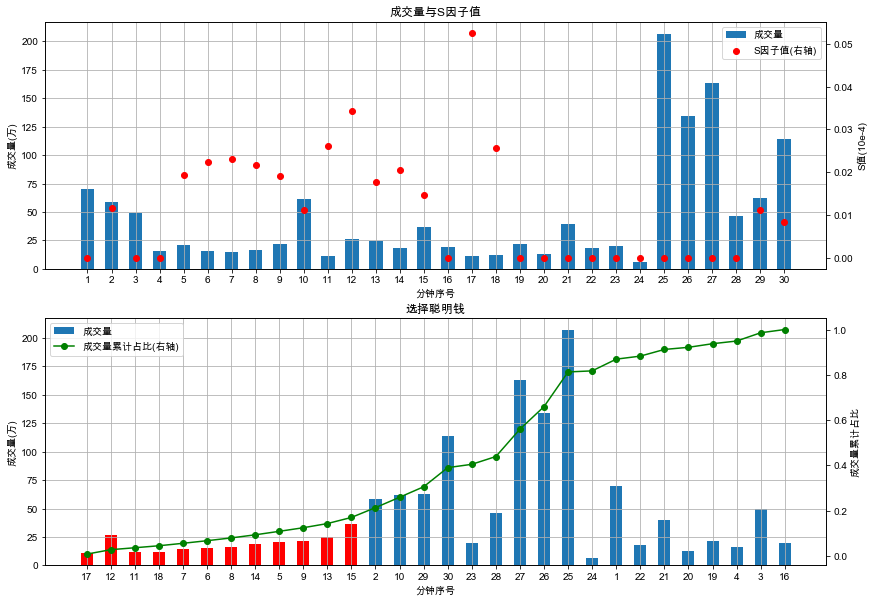

In [7]:
plot_S(pingan_S)

图表 1 的上半部分，是一段长度为半小时的分钟行情数据，按照时间顺序排列，
时间标签依次为 1 至 30，蓝柱代表每分钟的成交量，红点代表每分钟
的 S 值。图表 1 的下半部分，我们按照 S 值从大到小对行情数据进行
重新排序，柱子仍代表每分钟的成交量，绿线代表成交量从左到右的
累计占比（相对于总成交量）。最后，我们以成交量累计占比 20% 作为划分的界线，
将最左侧的 6 个分钟数据（红柱）划归为聪明钱的交易。剩余的分钟数据（蓝柱）则被划为普通资金的交易。

对于特定股票、特定时段的分钟行情数据，按照上述方法划分出
聪明钱的交易之后，我们可以构造聪明钱的情绪因子$Q$：

$Q = VWAP_{smart} / VWAP_{all}$

其中，$VWAP_{smart}$是聪明钱的成交量加权平均价，$VWAP_{all}$是所有交易
的成交量加权平均价。不难看出，因子$Q$实际上反映了在该时间段中
聪明钱参与交易的相对价位。之所以将其称为聪明钱的情绪因子，是
因为：因子$Q$的值越大，表明聪明钱的交易越倾向于出现在价格较高
处，这是逢高出货的表现，反映了聪明钱的悲观态度；因子$Q$的值越
小，则表明聪明钱的交易多出现在价格较低处，这是逢低吸筹的表现，
是乐观的情绪。


In [3]:
def calcQ(data_bar: pd.DataFrame) -> float:
    '''
    功能:
        计算Q值
    参数：
        DataFrame类型，特定股票一定时间段内的分钟数据（close，volume和S）
    返回：
        浮点数，即Q值
    '''
    data_bar = data_bar.sort_values(by='S',ascending=False).reset_index(drop=True)#按S值排序
    data_bar['acc_volume_pct'] = data_bar['volume'].cumsum()/data_bar['volume'].sum()#计算累计成交量
    smart_bar = data_bar[data_bar['acc_volume_pct']<=0.2]#聪明钱交易，累计成交量前20%
    #vwmap:volume weighted average price,成交量加权平均价
    vwap_smart = (smart_bar['close']*smart_bar['volume']).sum()/smart_bar['volume'].sum()
    vwap_all = (data_bar['close']*data_bar['volume']).sum()/data_bar['volume'].sum()
    return vwap_smart/vwap_all


情绪因子的选股能力

因子历史回测的基本框架如下：

1) 由于Wind分钟序列仅提供近三年数据，回测时段为 2020 年 3 月 19 日至 2023 年 3 月 19 日；

2) 样本空间为沪深300成分股，剔除 ST 股和上市未满 60 日的新股；（原研报为全部A股，但数据量过大，这里做了简化）

3) 组合每月月初调仓，交易费率设为双边千分之三；

4) 调仓时，涨停、停牌不买入，跌停、停牌不卖出。

在每个月的最后一个交易日，我们取所有股票最近 10 个交易日
的分钟行情数据，计算每只股票的情绪因子 Q。图表 2 给出了每个月
因子值与次月收益的秩相关系数（RankIC），显著为正的有 5 个（红
柱），显著为负的有 26 个（红柱），相关性不显著的有 6 个（淡色）。
情绪因子的 RankIC 基本为负的结论，结合前文关于聪明钱情绪的讨
论，说明跟随聪明钱的投资方向是有利可图的。

指标:

上市交易天数：ipo_tradedays: int

涨跌停状态：maxupordown: int -> 1:涨停；-1:跌停；0:未涨跌停

交易状态：trade_status: str -> "交易"; "停牌"

是否属于风险警示板：riskwarning: str

In [4]:
# 获取区间内市场交易日
def get_trade_days(start_date: str, end_date: str) -> list:
    if start_date == end_date:
        sz_trd_days = w.wsd("000001.SZ", "last_trade_day", start_date, end_date,"Days=Alldays",  usedf=True)[1]
        sh_trd_days = w.wsd("000001.SH", "last_trade_day", start_date, end_date,"Days=Alldays",  usedf=True)[1]
    else:
        sz_trd_days = w.wsd("000001.SZ", "last_trade_day", start_date, end_date, usedf=True)[1]
        sh_trd_days = w.wsd("000001.SH", "last_trade_day", start_date, end_date,  usedf=True)[1]
    trade_days = pd.merge(sz_trd_days, sh_trd_days, how='inner')
    trade_days = list(pd.to_datetime(trade_days.LAST_TRADE_DAY.values.astype(datetime.date)))
    return trade_days

In [5]:
trade_days = get_trade_days("2022-01-01", "2023-01-01")
len(trade_days)

242

In [6]:
def get_stocks(date: str, index: str = None) -> pd.DataFrame:
    s = pd.DataFrame(None)
    if index:
        stocks = w.wset("sectorconstituent","date="+date+";windcode="+index, usedf=True)[1][['wind_code','sec_name']]
        # print(date)
        for i,code in tqdm(enumerate(stocks['wind_code'])):

            stock_info = w.wsd(code, "ipo_tradedays,maxupordown,trade_status,riskwarning,open,close,volume",date, date, usedf=True)[1]
            # 上市到当前时间的交易天数
            ipo_trade_days = stock_info['IPO_TRADEDAYS'].values[0]
            # 是否涨跌停
            high_or_low_stop = stock_info['MAXUPORDOWN'].values[0]
            # 是否停牌
            is_pause = stock_info['TRADE_STATUS'].values[0]
            # 是否为ST股
            is_ST = stock_info['RISKWARNING'].values[0]

            if ("停牌" in is_pause) | ("是" in is_ST):
                stock_status = False
            elif (ipo_trade_days <= 60) | (high_or_low_stop != 0):
                stock_status = False
            else:
                stock_status = True

            if not stock_status:
                stocks.drop(stocks.index[i],inplace=True)
            else:
                s = pd.concat([s, stock_info[['OPEN', 'CLOSE', 'VOLUME']]])
    return s

def last_day_of_month(any_day: datetime.date) -> datetime.date:
    #获取某个日期所在月份的最后一天，方便在计算次月收益时获取次月的时间范围
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    return next_month - datetime.timedelta(days=next_month.day)


In [93]:
result={
    'months':[],#月份序列
    'stocks':[],#股票序列
    'Q':[],#Q值序列
    'return':[]#次月收益序列
}

days_count = len(trade_days)
# print(days_count)

# 遍历区间内所有交易日
for i,date in tqdm(enumerate(trade_days[:])):
    day = date.strftime("%Y-%m-%d %H:%M:%S")
    next_day = (date + datetime.timedelta(days=1)).strftime("%Y-%m-%d %H:%M:%S")
    print(day)

    # 对于列表最后一个交易日
    if date == trade_days[-1]:
        # 获取当日可交易的股票
        stocks = get_stocks(day, '000300.SH')
        stocks_list = list(stocks.index)

        # next_month_bar: 每只股票下个月的价格
        next_month_bar = pd.DataFrame(None)
        # 每只股票当日分钟数据，用来计算Q
        data = pd.DataFrame(None)
        last_day = last_day_of_month(date + datetime.timedelta(days=20))
        last_day = get_trade_days(last_day.strftime('%Y-%m-%d'), last_day.strftime('%Y-%m-%d'))
        last_day = last_day[0].strftime('%Y-%m-%d')

        print(last_day)            

        for code in stocks_list[:]:
            d_mon = w.wsd(code, "open,close", last_day, last_day, "Period=M", usedf=True)[1]
            next_month_bar = pd.concat([next_month_bar, d_mon])

            d_min = w.wsi(code, "open,close,volume", day, next_day, usedf=True)[1]
            d_min = get_smart_indicator_S(d_min)
            d_min['code'] = code
            data = pd.concat([data, d_min])
        data_groups = data.groupby('code')

        result['stocks'] += stocks_list
        result['months'] += [date.strftime('%Y-%m')]*stocks.shape[0]
        #依次计算每一只股票的Q值
        result['Q'] += [calcQ(data_bar) for name,data_bar in data_groups]
        result['return'] += list((next_month_bar['CLOSE'] - next_month_bar['OPEN']) / next_month_bar['OPEN'])
        break

    # 对于每月的最后一个交易日
    if trade_days[i+1].month != trade_days[i].month:
        stocks = get_stocks(day, '000300.SH')
        stocks_list = list(stocks.index)

        next_month_bar = pd.DataFrame(None)
        data = pd.DataFrame(None)
        last_day = last_day_of_month(trade_days[i+1])
        if last_day not in trade_days:
            for in_mon_day in trade_days:
                if last_day.strftime("%Y-%m") in str(in_mon_day):
                    last_day = in_mon_day

        print(last_day)        
        for code in stocks_list[:]:

            d_mon = w.wsd(code, "open,close", last_day, last_day, "Period=M", usedf=True)[1]
            next_month_bar = pd.concat([next_month_bar, d_mon])

            d_min = w.wsi(code, "open,close,volume", day, next_day, usedf=True)[1]
            d_min = get_smart_indicator_S(d_min)
            d_min['code'] = code
            data = pd.concat([data, d_min])
        data_groups = data.groupby('code')

        result['stocks'] += stocks_list
        result['months'] += [date.strftime('%Y-%m')]*stocks.shape[0]
        result['Q'] += [calcQ(data_bar) for name,data_bar in data_groups]
        result['return'] += list((next_month_bar['CLOSE'] - next_month_bar['OPEN']) / next_month_bar['OPEN'])
result


0it [00:00, ?it/s]

2022-01-04 00:00:00
2022-01-05 00:00:00
2022-01-06 00:00:00
2022-01-07 00:00:00
2022-01-10 00:00:00
2022-01-11 00:00:00
2022-01-12 00:00:00
2022-01-13 00:00:00
2022-01-14 00:00:00
2022-01-17 00:00:00
2022-01-18 00:00:00
2022-01-19 00:00:00
2022-01-20 00:00:00
2022-01-21 00:00:00
2022-01-24 00:00:00
2022-01-25 00:00:00
2022-01-26 00:00:00
2022-01-27 00:00:00
2022-01-28 00:00:00


0it [00:00, ?it/s]

2022-02-28 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00
2022-02-11 00:00:00
2022-02-14 00:00:00
2022-02-15 00:00:00
2022-02-16 00:00:00
2022-02-17 00:00:00
2022-02-18 00:00:00
2022-02-21 00:00:00
2022-02-22 00:00:00
2022-02-23 00:00:00
2022-02-24 00:00:00
2022-02-25 00:00:00
2022-02-28 00:00:00


0it [00:00, ?it/s]

2022-03-31 00:00:00
2022-03-01 00:00:00
2022-03-02 00:00:00
2022-03-03 00:00:00
2022-03-04 00:00:00
2022-03-07 00:00:00
2022-03-08 00:00:00
2022-03-09 00:00:00
2022-03-10 00:00:00
2022-03-11 00:00:00
2022-03-14 00:00:00
2022-03-15 00:00:00
2022-03-16 00:00:00
2022-03-17 00:00:00
2022-03-18 00:00:00
2022-03-21 00:00:00
2022-03-22 00:00:00
2022-03-23 00:00:00
2022-03-24 00:00:00
2022-03-25 00:00:00
2022-03-28 00:00:00
2022-03-29 00:00:00
2022-03-30 00:00:00
2022-03-31 00:00:00


0it [00:00, ?it/s]

2022-04-29 00:00:00
2022-04-01 00:00:00
2022-04-06 00:00:00
2022-04-07 00:00:00
2022-04-08 00:00:00
2022-04-11 00:00:00
2022-04-12 00:00:00
2022-04-13 00:00:00
2022-04-14 00:00:00
2022-04-15 00:00:00
2022-04-18 00:00:00
2022-04-19 00:00:00
2022-04-20 00:00:00
2022-04-21 00:00:00
2022-04-22 00:00:00
2022-04-25 00:00:00
2022-04-26 00:00:00
2022-04-27 00:00:00
2022-04-28 00:00:00
2022-04-29 00:00:00


0it [00:00, ?it/s]

2022-05-31 00:00:00
2022-05-05 00:00:00
2022-05-06 00:00:00
2022-05-09 00:00:00
2022-05-10 00:00:00
2022-05-11 00:00:00
2022-05-12 00:00:00
2022-05-13 00:00:00
2022-05-16 00:00:00
2022-05-17 00:00:00
2022-05-18 00:00:00
2022-05-19 00:00:00
2022-05-20 00:00:00
2022-05-23 00:00:00
2022-05-24 00:00:00
2022-05-25 00:00:00
2022-05-26 00:00:00
2022-05-27 00:00:00
2022-05-30 00:00:00
2022-05-31 00:00:00


0it [00:00, ?it/s]

2022-06-30 00:00:00
2022-06-01 00:00:00
2022-06-02 00:00:00
2022-06-06 00:00:00
2022-06-07 00:00:00
2022-06-08 00:00:00
2022-06-09 00:00:00
2022-06-10 00:00:00
2022-06-13 00:00:00
2022-06-14 00:00:00
2022-06-15 00:00:00
2022-06-16 00:00:00
2022-06-17 00:00:00
2022-06-20 00:00:00
2022-06-21 00:00:00
2022-06-22 00:00:00
2022-06-23 00:00:00
2022-06-24 00:00:00
2022-06-27 00:00:00
2022-06-28 00:00:00
2022-06-29 00:00:00
2022-06-30 00:00:00


0it [00:00, ?it/s]

2022-07-29 00:00:00
2022-07-01 00:00:00
2022-07-04 00:00:00
2022-07-05 00:00:00
2022-07-06 00:00:00
2022-07-07 00:00:00
2022-07-08 00:00:00
2022-07-11 00:00:00
2022-07-12 00:00:00
2022-07-13 00:00:00
2022-07-14 00:00:00
2022-07-15 00:00:00
2022-07-18 00:00:00
2022-07-19 00:00:00
2022-07-20 00:00:00
2022-07-21 00:00:00
2022-07-22 00:00:00
2022-07-25 00:00:00
2022-07-26 00:00:00
2022-07-27 00:00:00
2022-07-28 00:00:00
2022-07-29 00:00:00


0it [00:00, ?it/s]

2022-08-31 00:00:00
2022-08-01 00:00:00
2022-08-02 00:00:00
2022-08-03 00:00:00
2022-08-04 00:00:00
2022-08-05 00:00:00
2022-08-08 00:00:00
2022-08-09 00:00:00
2022-08-10 00:00:00
2022-08-11 00:00:00
2022-08-12 00:00:00
2022-08-15 00:00:00
2022-08-16 00:00:00
2022-08-17 00:00:00
2022-08-18 00:00:00
2022-08-19 00:00:00
2022-08-22 00:00:00
2022-08-23 00:00:00
2022-08-24 00:00:00
2022-08-25 00:00:00
2022-08-26 00:00:00
2022-08-29 00:00:00
2022-08-30 00:00:00
2022-08-31 00:00:00


0it [00:00, ?it/s]

2022-09-30 00:00:00
2022-09-01 00:00:00
2022-09-02 00:00:00
2022-09-05 00:00:00
2022-09-06 00:00:00
2022-09-07 00:00:00
2022-09-08 00:00:00
2022-09-09 00:00:00
2022-09-13 00:00:00
2022-09-14 00:00:00
2022-09-15 00:00:00
2022-09-16 00:00:00
2022-09-19 00:00:00
2022-09-20 00:00:00
2022-09-21 00:00:00
2022-09-22 00:00:00
2022-09-23 00:00:00
2022-09-26 00:00:00
2022-09-27 00:00:00
2022-09-28 00:00:00
2022-09-29 00:00:00
2022-09-30 00:00:00


0it [00:00, ?it/s]

2022-10-31 00:00:00
2022-10-10 00:00:00
2022-10-11 00:00:00
2022-10-12 00:00:00
2022-10-13 00:00:00
2022-10-14 00:00:00
2022-10-17 00:00:00
2022-10-18 00:00:00
2022-10-19 00:00:00
2022-10-20 00:00:00
2022-10-21 00:00:00
2022-10-24 00:00:00
2022-10-25 00:00:00
2022-10-26 00:00:00
2022-10-27 00:00:00
2022-10-28 00:00:00
2022-10-31 00:00:00


0it [00:00, ?it/s]

2022-11-30 00:00:00
2022-11-01 00:00:00
2022-11-02 00:00:00
2022-11-03 00:00:00
2022-11-04 00:00:00
2022-11-07 00:00:00
2022-11-08 00:00:00
2022-11-09 00:00:00
2022-11-10 00:00:00
2022-11-11 00:00:00
2022-11-14 00:00:00
2022-11-15 00:00:00
2022-11-16 00:00:00
2022-11-17 00:00:00
2022-11-18 00:00:00
2022-11-21 00:00:00
2022-11-22 00:00:00
2022-11-23 00:00:00
2022-11-24 00:00:00
2022-11-25 00:00:00
2022-11-28 00:00:00
2022-11-29 00:00:00
2022-11-30 00:00:00


0it [00:00, ?it/s]

2022-12-30 00:00:00
2022-12-01 00:00:00
2022-12-02 00:00:00
2022-12-05 00:00:00
2022-12-06 00:00:00
2022-12-07 00:00:00
2022-12-08 00:00:00
2022-12-09 00:00:00
2022-12-12 00:00:00
2022-12-13 00:00:00
2022-12-14 00:00:00
2022-12-15 00:00:00
2022-12-16 00:00:00
2022-12-19 00:00:00
2022-12-20 00:00:00
2022-12-21 00:00:00
2022-12-22 00:00:00
2022-12-23 00:00:00
2022-12-26 00:00:00
2022-12-27 00:00:00
2022-12-28 00:00:00
2022-12-29 00:00:00
2022-12-30 00:00:00


0it [00:00, ?it/s]

2023-01-31


{'months': ['2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  '2022-01',
  

In [94]:
pd.DataFrame(result).to_excel('./result.xlsx')

In [95]:
df = pd.DataFrame(result)
df.to_excel('./result.xlsx')
result = pd.read_excel('./result.xlsx').drop('stocks', axis=1)
result_group = result.groupby('months')
#存储月份和每月两个序列的秩相关系数
result_df = {
    'months':[],
    'RankIC':[]
}
for month,month_result in result_group:
    result_df['months'].append(month)
    result_df['RankIC'].append(month_result.corr(method='spearman')['Q']['return'])
#以0.03作为阈值来划分显著和不显著相关    
result_df = pd.DataFrame(result_df)
ic_plus = result_df[result_df['RankIC']>0.03]
ic_minus = result_df[result_df['RankIC']<-0.03]
ic_other = result_df[(result_df['RankIC']>=-0.03) &(result_df['RankIC']<=0.03)]
print('显著为负: ',ic_minus.shape[0])
print('显著为正: ',ic_plus.shape[0])
print('不显著:',ic_other.shape[0])


显著为负:  4
显著为正:  7
不显著: 1


([<matplotlib.axis.XTick at 0x1ccb6c2f070>,
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07'),
  Text(7, 0, '2022-08'),
  Text(8, 0, '2022-09'),
  Text(9, 0, '2022-10'),
  Text(10, 0, '2022-11'),
  Text(11, 0, '2022-12')])

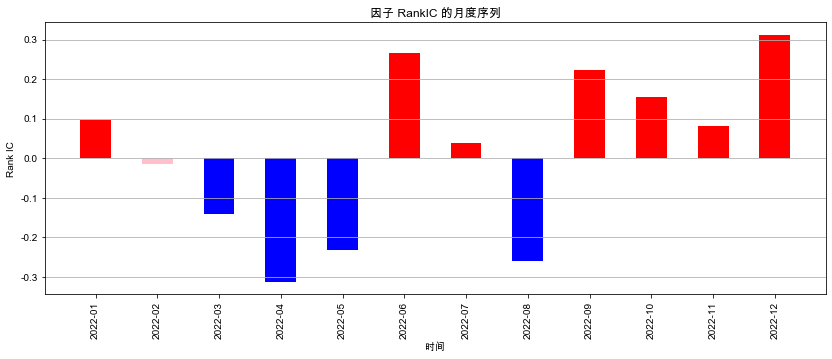

In [96]:
#可视化
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111)
ax1.bar(ic_other.index, ic_other['RankIC'], align='center', width=0.5, color='pink')
ax1.bar(ic_plus.index, ic_plus['RankIC'], align='center', width=0.5, color='r')
ax1.bar(ic_minus.index, ic_minus['RankIC'], align='center', width=0.5, color='b')
ax1.set_ylabel(u"Rank IC")
ax1.set_title(u"因子 RankIC 的月度序列")
ax1.set_xlabel(u"时间" )
ax1.grid(axis='y')
plt.xticks(result_df.index, result_df['months'],rotation='vertical')

In [7]:
class Position():
    '''
    为了方便回测，我们新建了一个仓位类，来对应每一组的账户。
    该类具有当前持有的股票列表、对应的价格、每只股票持有数量、现金、账户净值这些属性
    提供了更新价格、调整仓位的功能，并可以维护现金和账户净值
    '''
    def __init__(
        self,
        stocks = np.array([]),
        price = np.array([]),
        weight = np.array([]),
        cash = 0
    ):
        self.stocks = stocks
        self.price = price
        self.weight = weight
        self.cash = cash
        if not self.stocks.size:
            self.net_value = self.cash
        else:
            self.net_value = (self.weight * self.price).sum() + self.cash
    def update_price(self, price):
        #传入一个价格序列，对应持有股票的最新价格
        for i,p in enumerate(price):
            if not np.isnan(p):
                self.price[i] = p
        self.net_value = (self.weight * self.price).sum() + self.cash
    def change_position(self, new_stocks, price,commission):
        #更新仓位，传入筛选出的股票列表和对应的价格
        
        for i,stock in enumerate(self.stocks):#原有股票不在新列表中，需要卖出
            if stock not in new_stocks:
                self.cash += self.price[i] * self.weight[i] * (1 - commission)
        
        #计算每一只股票应持有的数量
        new_weight = self.net_value * 0.99 / len(new_stocks) / price
        new_weight = [int(i) for i in new_weight]
        
        for i,stock in enumerate(self.stocks):#原有股票在新列表中，需要调整数量
            if stock in new_stocks:
                weight_chg = new_weight[list(new_stocks).index(stock)] - self.weight[i]
                self.cash -= self.price[i] * weight_chg\
                              + abs(self.price[i] * weight_chg) * commission
                
        for i,stock in enumerate(new_stocks):#新增股票，需要买入
            if stock not in new_stocks:
                self.cash -= price[i] * new_weight[i] * (1 + commission)
        self.stocks = new_stocks
        self.weight = new_weight
        self.price = price
        self.net_value = (self.weight * self.price).sum() + self.cash


In [9]:
capital_base = 1000000 #初始资金
commission = 0.003     #交易费率
#五组仓位
position_dict = {
    1: Position(cash = capital_base),
    2: Position(cash = capital_base),
    3: Position(cash = capital_base),
    4: Position(cash = capital_base),
    5: Position(cash = capital_base)
}
# 净值统计
net_value_dict = {
    'month':[],# 时间
    1:[],# 每一组每个月月末的净值序列
    2:[],
    3:[],
    4:[],
    5:[]
}
# trade_days = get_trade_days(start_date='2021-01-01', end_date='2022-01-01')
days_count = len(trade_days)

# 遍历交易日
for i,date in tqdm(enumerate(trade_days)):
    day = date.strftime("%Y-%m-%d %H:%M:%S")
    next_day = (date + datetime.timedelta(days=1)).strftime("%Y-%m-%d %H:%M:%S")
    last_ten_day = trade_days[i-10]
    last_ten_day = last_ten_day.strftime("%Y-%m-%d %H:%M:%S")
    print(day)    

    # 如果是列表最后一个日期 或 每月的最后一个交易日
    if  date == trade_days[-1] or trade_days[i+1].month != trade_days[i].month:
        
        # 可交易股票
        stocks = get_stocks(day, '000300.SH')
        stocks_list = list(stocks.index)

        #股票的前10天的分钟数据，并根据股票分组
        min_data = pd.DataFrame(None)
        for code in stocks_list:
            d_min = w.wsi(code, "open,close,volume", last_ten_day, day, usedf=True)[1]
            d_min = get_smart_indicator_S(d_min)
            d_min['code'] = code
            min_data = pd.concat([min_data, d_min])
        data_groups = min_data.groupby('code')

        #计算每一只股票的Q值
        stocks['Q'] = [calcQ(data_bar) for name,data_bar in data_groups]
        #Q值排序
        stocks = stocks[['Q', 'CLOSE']].rename(columns={'CLOSE': 'price'}).sort_values(by='Q').reset_index()
        lens = stocks.shape[0]
        #根据Q值的大小等分为5组
        s_1 = stocks[stocks['Q'].isin(stocks['Q'][:int(0.2*lens)])].reset_index()
        s_2 = stocks[stocks['Q'].isin(stocks['Q'][int(0.2*lens):int(0.4*lens)])].reset_index()
        s_3 = stocks[stocks['Q'].isin(stocks['Q'][int(0.4*lens):int(0.6*lens)])].reset_index()
        s_4 = stocks[stocks['Q'].isin(stocks['Q'][int(0.6*lens):int(0.8*lens)])].reset_index()
        s_5 = stocks[stocks['Q'].isin(stocks['Q'][int(0.8*lens):])].reset_index()
        
        #如果有持仓数据
        if position_dict[1].stocks.size:
            #更新持仓价格
            for cls in range(1,6):
                    price = []
                    for code in position_dict[cls].stocks:
                        price.append(w.wsd(code, "close",date, date, usedf=True)[1]['CLOSE'][0])
                    
                    position_dict[cls].update_price(np.array(price))
                    # position_dict[cls].update_price(
                    #     price = get_stocks(                       
                    #         security = list(position_dict[cls].stocks),
                    #         count = 1,
                    #         end_date = trade_days[i],
                    #         panel = False
                    #     )['close']
                    # )
        #调仓
        position_dict[1].change_position(new_stocks=s_1['index'],price = s_1['price'],commission=commission)            
        position_dict[2].change_position(new_stocks=s_2['index'],price = s_2['price'],commission=commission)
        position_dict[3].change_position(new_stocks=s_3['index'],price = s_3['price'],commission=commission)
        position_dict[4].change_position(new_stocks=s_4['index'],price = s_4['price'],commission=commission)
        position_dict[5].change_position(new_stocks=s_5['index'],price = s_5['price'],commission=commission)
        
        #添加该月的结果
        net_value_dict['month'].append(trade_days[i])
        for cls in range(1,6):
            net_value_dict[cls].append(position_dict[cls].net_value)
            continue


0it [00:00, ?it/s]

2022-01-04 00:00:00
2022-01-05 00:00:00
2022-01-06 00:00:00
2022-01-07 00:00:00
2022-01-10 00:00:00
2022-01-11 00:00:00
2022-01-12 00:00:00
2022-01-13 00:00:00
2022-01-14 00:00:00
2022-01-17 00:00:00
2022-01-18 00:00:00
2022-01-19 00:00:00
2022-01-20 00:00:00
2022-01-21 00:00:00
2022-01-24 00:00:00
2022-01-25 00:00:00
2022-01-26 00:00:00
2022-01-27 00:00:00
2022-01-28 00:00:00


0it [00:00, ?it/s]

2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00
2022-02-11 00:00:00
2022-02-14 00:00:00
2022-02-15 00:00:00
2022-02-16 00:00:00
2022-02-17 00:00:00
2022-02-18 00:00:00
2022-02-21 00:00:00
2022-02-22 00:00:00
2022-02-23 00:00:00
2022-02-24 00:00:00
2022-02-25 00:00:00
2022-02-28 00:00:00


0it [00:00, ?it/s]

2022-03-01 00:00:00
2022-03-02 00:00:00
2022-03-03 00:00:00
2022-03-04 00:00:00
2022-03-07 00:00:00
2022-03-08 00:00:00
2022-03-09 00:00:00
2022-03-10 00:00:00
2022-03-11 00:00:00
2022-03-14 00:00:00
2022-03-15 00:00:00
2022-03-16 00:00:00
2022-03-17 00:00:00
2022-03-18 00:00:00
2022-03-21 00:00:00
2022-03-22 00:00:00
2022-03-23 00:00:00
2022-03-24 00:00:00
2022-03-25 00:00:00
2022-03-28 00:00:00
2022-03-29 00:00:00
2022-03-30 00:00:00
2022-03-31 00:00:00


0it [00:00, ?it/s]

2022-04-01 00:00:00
2022-04-06 00:00:00
2022-04-07 00:00:00
2022-04-08 00:00:00
2022-04-11 00:00:00
2022-04-12 00:00:00
2022-04-13 00:00:00
2022-04-14 00:00:00
2022-04-15 00:00:00
2022-04-18 00:00:00
2022-04-19 00:00:00
2022-04-20 00:00:00
2022-04-21 00:00:00
2022-04-22 00:00:00
2022-04-25 00:00:00
2022-04-26 00:00:00
2022-04-27 00:00:00
2022-04-28 00:00:00
2022-04-29 00:00:00


0it [00:00, ?it/s]

2022-05-05 00:00:00
2022-05-06 00:00:00
2022-05-09 00:00:00
2022-05-10 00:00:00
2022-05-11 00:00:00
2022-05-12 00:00:00
2022-05-13 00:00:00
2022-05-16 00:00:00
2022-05-17 00:00:00
2022-05-18 00:00:00
2022-05-19 00:00:00
2022-05-20 00:00:00
2022-05-23 00:00:00
2022-05-24 00:00:00
2022-05-25 00:00:00
2022-05-26 00:00:00
2022-05-27 00:00:00
2022-05-30 00:00:00
2022-05-31 00:00:00


0it [00:00, ?it/s]

2022-06-01 00:00:00
2022-06-02 00:00:00
2022-06-06 00:00:00
2022-06-07 00:00:00
2022-06-08 00:00:00
2022-06-09 00:00:00
2022-06-10 00:00:00
2022-06-13 00:00:00
2022-06-14 00:00:00
2022-06-15 00:00:00
2022-06-16 00:00:00
2022-06-17 00:00:00
2022-06-20 00:00:00
2022-06-21 00:00:00
2022-06-22 00:00:00
2022-06-23 00:00:00
2022-06-24 00:00:00
2022-06-27 00:00:00
2022-06-28 00:00:00
2022-06-29 00:00:00
2022-06-30 00:00:00


0it [00:00, ?it/s]

2022-07-01 00:00:00
2022-07-04 00:00:00
2022-07-05 00:00:00
2022-07-06 00:00:00
2022-07-07 00:00:00
2022-07-08 00:00:00
2022-07-11 00:00:00
2022-07-12 00:00:00
2022-07-13 00:00:00
2022-07-14 00:00:00
2022-07-15 00:00:00
2022-07-18 00:00:00
2022-07-19 00:00:00
2022-07-20 00:00:00
2022-07-21 00:00:00
2022-07-22 00:00:00
2022-07-25 00:00:00
2022-07-26 00:00:00
2022-07-27 00:00:00
2022-07-28 00:00:00
2022-07-29 00:00:00


0it [00:00, ?it/s]

2022-08-01 00:00:00
2022-08-02 00:00:00
2022-08-03 00:00:00
2022-08-04 00:00:00
2022-08-05 00:00:00
2022-08-08 00:00:00
2022-08-09 00:00:00
2022-08-10 00:00:00
2022-08-11 00:00:00
2022-08-12 00:00:00
2022-08-15 00:00:00
2022-08-16 00:00:00
2022-08-17 00:00:00
2022-08-18 00:00:00
2022-08-19 00:00:00
2022-08-22 00:00:00
2022-08-23 00:00:00
2022-08-24 00:00:00
2022-08-25 00:00:00
2022-08-26 00:00:00
2022-08-29 00:00:00
2022-08-30 00:00:00
2022-08-31 00:00:00


0it [00:00, ?it/s]

2022-09-01 00:00:00
2022-09-02 00:00:00
2022-09-05 00:00:00
2022-09-06 00:00:00
2022-09-07 00:00:00
2022-09-08 00:00:00
2022-09-09 00:00:00
2022-09-13 00:00:00
2022-09-14 00:00:00
2022-09-15 00:00:00
2022-09-16 00:00:00
2022-09-19 00:00:00
2022-09-20 00:00:00
2022-09-21 00:00:00
2022-09-22 00:00:00
2022-09-23 00:00:00
2022-09-26 00:00:00
2022-09-27 00:00:00
2022-09-28 00:00:00
2022-09-29 00:00:00
2022-09-30 00:00:00


0it [00:00, ?it/s]

2022-10-10 00:00:00
2022-10-11 00:00:00
2022-10-12 00:00:00
2022-10-13 00:00:00
2022-10-14 00:00:00
2022-10-17 00:00:00
2022-10-18 00:00:00
2022-10-19 00:00:00
2022-10-20 00:00:00
2022-10-21 00:00:00
2022-10-24 00:00:00
2022-10-25 00:00:00
2022-10-26 00:00:00
2022-10-27 00:00:00
2022-10-28 00:00:00
2022-10-31 00:00:00


0it [00:00, ?it/s]

2022-11-01 00:00:00
2022-11-02 00:00:00
2022-11-03 00:00:00
2022-11-04 00:00:00
2022-11-07 00:00:00
2022-11-08 00:00:00
2022-11-09 00:00:00
2022-11-10 00:00:00
2022-11-11 00:00:00
2022-11-14 00:00:00
2022-11-15 00:00:00
2022-11-16 00:00:00
2022-11-17 00:00:00
2022-11-18 00:00:00
2022-11-21 00:00:00
2022-11-22 00:00:00
2022-11-23 00:00:00
2022-11-24 00:00:00
2022-11-25 00:00:00
2022-11-28 00:00:00
2022-11-29 00:00:00
2022-11-30 00:00:00


0it [00:00, ?it/s]

2022-12-01 00:00:00
2022-12-02 00:00:00
2022-12-05 00:00:00
2022-12-06 00:00:00
2022-12-07 00:00:00
2022-12-08 00:00:00
2022-12-09 00:00:00
2022-12-12 00:00:00
2022-12-13 00:00:00
2022-12-14 00:00:00
2022-12-15 00:00:00
2022-12-16 00:00:00
2022-12-19 00:00:00
2022-12-20 00:00:00
2022-12-21 00:00:00
2022-12-22 00:00:00
2022-12-23 00:00:00
2022-12-26 00:00:00
2022-12-27 00:00:00
2022-12-28 00:00:00
2022-12-29 00:00:00
2022-12-30 00:00:00


0it [00:00, ?it/s]

In [15]:
data_temp = pd.DataFrame(net_value_dict)
data_temp

,month,1,2,3,4,5
0,2022-01-28,997034.66467,9.970400e+05,9.970349e+05,9.970355e+05,997035.70903
1,2022-02-28,983082.67754,1.010698e+06,1.016787e+06,1.009364e+06,992787.17244
2,2022-03-31,869918.59617,9.317168e+05,9.432881e+05,9.267359e+05,914521.95952
3,2022-04-29,815778.51987,8.730389e+05,8.934705e+05,8.551939e+05,839794.82195
4,2022-05-31,868398.52755,9.181286e+05,8.960883e+05,8.525337e+05,842317.55923
5,2022-06-30,915062.53119,9.728492e+05,9.596879e+05,9.053696e+05,918616.99216
6,2022-07-29,846955.91670,9.131263e+05,8.806318e+05,8.475643e+05,837971.44769
7,2022-08-31,806628.44494,8.974035e+05,8.697525e+05,8.187076e+05,816066.96560
8,2022-09-30,721034.66980,8.270562e+05,8.196286e+05,7.514830e+05,761384.30286
9,2022-10-31,689935.94016,7.923591e+05,7.621894e+05,7.376146e+05,733514.92299


In [16]:
data_temp.to_excel('./net_value_df.xlsx')

<Figure size 1008x432 with 0 Axes>

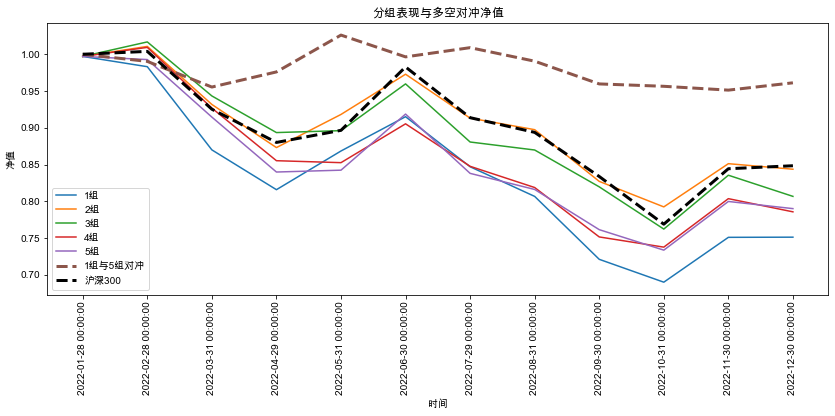

In [32]:
           
#可视化
net_value_df = pd.DataFrame(net_value_dict)
net_value_df.to_excel('net_value_df.xlsx')
net_value_df = pd.DataFrame(net_value_dict)
plt.figure(figsize=(14,6))
net_value_df[1] = (net_value_df[1]/1000000)
net_value_df[2] = (net_value_df[2]/1000000)
net_value_df[3] = (net_value_df[3]/1000000)
net_value_df[4] = (net_value_df[4]/1000000)
net_value_df[5] = (net_value_df[5]/1000000)
net_value_df['1与5对冲'] = net_value_df[1] - net_value_df[5]+1
# index=get_bars(
#             '000300.XSHG', 
#             count = 37, 
#             unit = '1M',
#             fields = ['close'],
#             df = True,
#             include_now=True,
#             end_dt = '2016-05-31'
#         )['close']
index = w.wsd('000300.SH', "close","2022-01-01", "2023-01-01", "Period=M", usedf=True)[1]['CLOSE'].values

        # #每只股票下个月的价格
        # next_month_bar = get_bars(
        #     stocks_list, 
        #     count = 1, 
        #     unit = '1M',
        #     fields = ['open','close'],
        #     df = True,
        #     include_now=True,
        #     end_dt = '2016-06-30'
        # )
index = index/index[0]
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(111)
ax.plot(net_value_df['month'].index,net_value_df[1],label='1组')
ax.plot(net_value_df['month'].index,net_value_df[2],label='2组')
ax.plot(net_value_df['month'].index,net_value_df[3],label='3组')
ax.plot(net_value_df['month'].index,net_value_df[4],label='4组')
ax.plot(net_value_df['month'].index,net_value_df[5],label='5组')
ax.plot(net_value_df['month'].index,net_value_df['1与5对冲'],label='1组与5组对冲',linestyle='--',linewidth=3)
ax.plot(net_value_df['month'].index,index,linestyle='--',label='沪深300',color='black',linewidth=3)
ax.set_xlabel(u"时间")
ax.set_ylabel(u"净值")
ax.set_title(u"分组表现与多空对冲净值")
plt.xticks(net_value_df['month'].index,net_value_df['month'],rotation=90)
plt.legend()


In [ ]:
# capital_base = 1000000
# position_dict_2 = {
#     1:Position(cash=capital_base)
# }
# net_value_dict_2 = {
#     'month':[],
#     1:[]
# }

# # trade_days = get_trade_days(start_date='2013-04-30', end_date='2016-05-31')
# days_count = len(trade_days)
# commission = 0.003
# for i in range(days_count):
#     if i == days_count-1 or trade_days[i+1].month != trade_days[i].month:
#         stocks = get_stocks(trade_days[i],index='000300.XSHG')
#         stocks_list = list(stocks.index)
#         data = get_minute_data(
#             stocks_list,
#             2400,
#             end_dt=trade_days[i]
#         ).reset_index(level=0).rename(columns={'level_0':'code'})
#         data_groups = data.groupby('code')
#         stocks['Q'] = [calcQ(data_bar) for name,data_bar in data_groups]
#         stocks = stocks.sort_values(by='Q').reset_index()
#         lens = stocks.shape[0]
#         s_1 = stocks[stocks['Q'].isin(stocks['Q'][:int(0.2*lens)])].reset_index(drop=True)
#         month_bar = get_bars(
#             list(s_1['index']), 
#             count = 1, 
#             unit = '1M',
#             fields = ['open','close'],
#             df = True,
#             include_now=True,
#             end_dt = trade_days[i]
#         ).reset_index(drop=True)
        
#         #剔除涨幅过高的20%的股票
#         s_1['ratio'] = (month_bar['close'] - month_bar['open'])/month_bar['open']
#         s_1 = s_1.sort_values(by='ratio').reset_index(drop=True)
#         lens = s_1.shape[0]
#         s_1 = s_1[s_1['ratio'].isin(s_1['ratio'][:int(0.8*lens)])]
        
        
#         if position_dict_2[1].stocks.size:
#                 position_dict_2[1].update_price(
#                     price=get_price(                       
#                         security = list(position_dict_2[1].stocks),
#                         count = 1,
#                         end_date = trade_days[i],
#                         panel = False
#                     )['close']
#                 )
#         position_dict_2[1].change_position(new_stocks=s_1['index'],price = s_1['price'],commission=commission)            
#         net_value_dict_2['month'].append(trade_days[i])
#         net_value_dict_2[1].append(position_dict_2[1].net_value)
        
        
# #可视化
# net_value_df_2 = pd.DataFrame(net_value_dict_2)
# net_value_df_2[1] = (net_value_df_2[1]/1000000)
# index=get_bars(
#             '000300.XSHG', 
#             count = 37, 
#             unit = '1M',
#             fields = ['close'],
#             df = True,
#             include_now=True,
#             end_dt = '2016-05-31'
#         )['close']
# index = index/index[0]
# fig=plt.figure(figsize=(14,5))
# ax = fig.add_subplot(111)
# ax.plot(net_value_df_2['month'].index,net_value_df_2[1],label='SMART选股组合')
# ax.plot(net_value_df_2['month'].index,index,label='沪深300')
# ax.set_xlabel(u"时间")
# ax.set_ylabel(u"净值")
# ax.set_title(u"SMART选股组合")
# plt.xticks(net_value_df_2['month'].index,net_value_df['month'],rotation=90)
# plt.legend()
